# OBJETIVO: ESTUDAR O USO DE INTERNET E SEUS MEIOS NO NORDESTE

# Hugo Gonçalves Rocha - Ciência dos Dados
    
    
            Um grande indicador de desenvolvimento de um determinado local é o acesso que seus habitantes possuem à internet. No Brasil, a 11ª edição da pesquisa TIC Domicílios 2015 afirma que apenas 58% dos brasileiros possuem acesso à internet, e naturalmente, as regiões mais pobres estão mais sujeitas à falta do recurso. A região brasileira mais pobre em termos absolutos é o Nordeste. Embora apresente melhora ao longo dos anos, a região possuia, segundo dados do IPEA, metade da população considerada pobre do país ao fim da primeira década do século XXI.
            Meu objetivo no Projeto 1 de Ciência dos Dados é estudar como o uso da internet se difundiu/retraiu entre os anos de 2013 e 2015. Para isso, utilizarei os dados da PNAD no que diz respeito ao uso de internet em casa e os meios para tal (celular, computador, tablet). O objetivo principal é comparar a situação nos três anos e identificar a possível causa de melhora/piora.

# Perguntas

- Qual estado do nordeste apresentou maior melhora no número de pessoas com acesso à internet no período?
- O meio rural tornou-se mais conectado?
- Qual meio de acesso apresentou maior crescimento em números absolutos de usuários no período?

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
from numpy import arange

In [26]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())
dados = pd.read_csv('DOM2015.csv')
dados2 = pd.read_csv('DOM2014.csv')
dados3 = pd.read_csv('DOM2013.csv')

Esperamos trabalhar no diretório
C:\Users\hugon\Desktop\INSPER\2º semestre\Ciência dos Dados\Projeto 1


In [34]:
#VARIÁVEIS 2013
dados.UF2013 = dados3.UF.astype('category')
dados.ACESSO2013 = dados3.V02322.astype('category')
dados.SALARIO2013 = dados3.V4621.astype('float')
dados.COMP2013 = dados3.V02323.astype('category')
dados.CEL2013 = dados3.V02324.astype('category')
dados.REG2013 = dados3.V4105.astype('category')
dados.TAB2013 = dados3.V02325.astype('category')



# VARIÁVEIS 2014
dados.UF2014 = dados2.UF.astype('category')
dados.ACESSO2014 = dados2.V02322.astype('category')
dados.SALARIO2014 = dados2.V4621.astype('float')
dados.COMP2014 = dados2.V02323.astype('category')
dados.CEL2014 = dados2.V02324.astype('category')
dados.REG2014 = dados2.V4105.astype('category')
dados.TAB2014 = dados2.V02325.astype('category')


# VARIÁVEIS 2015
dados.UF2015 = dados.UF.astype('category')
dados.ACESSO2015 = dados.V02322.astype('category')
dados.SALARIO2015 = dados.V4621.astype('float')
dados.COMP2015 = dados.V02323.astype('category')
dados.CEL2015 = dados.V02324.astype('category')
dados.REG2015 = dados.V4105.astype('category')
dados.TAB2015 = dados.V02325.astype('category')

In [36]:
dados.UF2013.cat.categories = (['Rondônia','Acre','Amazonas','Roraima','Pará','Amapá','Tocantins','Maranhão','Piauí','Ceará','Rio Grande do Norte','Paraíba','Pernambuco','Alagoas','Sergipe','Bahia','Minas Gerais','Espírito Santo','Rio de Janeiro','São Paulo','Paraná','Santa Catarina','Rio Grande do Sul','Mato Grosso do Sul','Mato Grosso','Goiás','Distrito Federal'])
dados.ACESSO2013.cat.categories = (['Possui acesso','Não possui acesso'])
dados.COMP2013.cat.categories = (['Sim','Não'])
dados.CEL2013.cat.categories = (['Sim','Não'])
dados.REG2013.cat.categories = (['URBANA - Cidade ou vila, área urbanizada', 'URBANA - Cidade ou vila, área não urbanizada','URBANA - área urbana isolada','RURAL - Aglomerado rural de extensão urbana','RURAL - Aglomerado rural, isolado, povoado','RURAL - Aglomerado rural, isolado, núcleo','RURAL - Aglomerado rural, isolado, outros aglomerados','RURAL - Zona rural exclusive aglomerado rural'])
dados.TAB2013.cat.categories = (['Sim','Não'])

d1 = pd.concat([dados.UF2013, dados.REG2013, dados.SALARIO2013, dados.ACESSO2013], axis = 1)
d1.columns = ['ESTADO','ZONA','RENDA PER CAPITA (em R$)','ACESSO À INTERNET EM CASA']
nordeste2013a = d1[(d1['ESTADO'] == 'Maranhão') | (d1['ESTADO'] == 'Piauí')| (d1['ESTADO'] == 'Ceará')| (d1['ESTADO'] == 'Rio Grande do Norte')| (d1['ESTADO'] == 'Paraíba')| (d1['ESTADO'] == 'Pernambuco')| (d1['ESTADO'] == 'Alagoas')| (d1['ESTADO'] == 'Sergipe')| (d1['ESTADO'] == 'Bahia')]
nordeste2013a = nordeste2013a.dropna()

nordeste2013a.loc[(dados.REG2013 =='URBANA - Cidade ou vila, área urbanizada') |(dados.REG2013 == 'URBANA - Cidade ou vila, área não urbanizada')|(dados.REG2013 =='URBANA - área urbana isolada'), 'ZONA2'] = 'Urbana'
nordeste2013a.loc[(dados.REG2013 =='RURAL - Aglomerado rural de extensão urbana')|(dados.REG2013 == 'RURAL - Aglomerado rural, isolado, povoado')|(dados.REG2013 =='RURAL - Aglomerado rural, isolado, núcleo') | (dados.REG2013 == 'RURAL - Aglomerado rural, isolado, outros aglomerados')|(dados.REG2013 == 'RURAL - Zona rural exclusive aglomerado rural'), 'ZONA2']= 'Rural'


In [41]:
d12 = pd.concat([dados.UF2013, dados.REG2013, dados.SALARIO2013, dados.ACESSO2013, dados.COMP2013, dados.CEL2013, dados.TAB2013], axis = 1)
d12.columns = ['ESTADO','ZONA','RENDA PER CAPITA (em R$)','ACESSO À INTERNET EM CASA','ACESSO À INTERNET POR MICROCOMPUTADOR', 'ACESSO À INTERNET POR CELULAR', 'ACESSO À INTERNET POR TABLET' ]
nordeste2013b = d12[(d12['ESTADO'] == 'Maranhão') | (d12['ESTADO'] == 'Piauí')| (d12['ESTADO'] == 'Ceará')| (d12['ESTADO'] == 'Rio Grande do Norte')| (d12['ESTADO'] == 'Paraíba')| (d12['ESTADO'] == 'Pernambuco')| (d12['ESTADO'] == 'Alagoas')| (d12['ESTADO'] == 'Sergipe')| (d12['ESTADO'] == 'Bahia')]
nordeste2013b = nordeste2013b[(nordeste2013b['RENDA PER CAPITA (em R$)']<9999999999)]

nordeste2013b.loc[(dados.REG2013 =='URBANA - Cidade ou vila, área urbanizada') |(dados.REG2013 == 'URBANA - Cidade ou vila, área não urbanizada')|(dados.REG2013 =='URBANA - área urbana isolada'), 'ZONA2'] = 'Urbana'
nordeste2013b.loc[(dados.REG2013 =='RURAL - Aglomerado rural de extensão urbana')|(dados.REG2013 == 'RURAL - Aglomerado rural, isolado, povoado')|(dados.REG2013 =='RURAL - Aglomerado rural, isolado, núcleo') | (dados.REG2013 == 'RURAL - Aglomerado rural, isolado, outros aglomerados')|(dados.REG2013 == 'RURAL - Zona rural exclusive aglomerado rural'), 'ZONA2']= 'Rural'

nordeste2013b = nordeste2013b.dropna()

In [40]:
dados.UF2014.cat.categories = (['Rondônia','Acre','Amazonas','Roraima','Pará','Amapá','Tocantins','Maranhão','Piauí','Ceará','Rio Grande do Norte','Paraíba','Pernambuco','Alagoas','Sergipe','Bahia','Minas Gerais','Espírito Santo','Rio de Janeiro','São Paulo','Paraná','Santa Catarina','Rio Grande do Sul','Mato Grosso do Sul','Mato Grosso','Goiás','Distrito Federal'])
dados.ACESSO2014.cat.categories = (['Possui acesso','Não possui acesso'])
dados.COMP2014.cat.categories = (['Sim','Não'])
dados.CEL2014.cat.categories = (['Sim','Não'])
dados.REG2014.cat.categories = (['URBANA - Cidade ou vila, área urbanizada', 'URBANA - Cidade ou vila, área não urbanizada','URBANA - área urbana isolada','RURAL - Aglomerado rural de extensão urbana','RURAL - Aglomerado rural, isolado, povoado','RURAL - Aglomerado rural, isolado, núcleo','RURAL - Aglomerado rural, isolado, outros aglomerados','RURAL - Zona rural exclusive aglomerado rural'])
dados.TAB2014.cat.categories = (['Sim','Não'])

d2 = pd.concat([dados.UF2014, dados.REG2014, dados.SALARIO2014, dados.ACESSO2014], axis = 1)
d2.columns = ['ESTADO','ZONA','RENDA PER CAPITA (em R$)','ACESSO À INTERNET EM CASA']
nordeste2014a = d2[(d2['ESTADO'] == 'Maranhão') | (d2['ESTADO'] == 'Piauí')| (d2['ESTADO'] == 'Ceará')| (d2['ESTADO'] == 'Rio Grande do Norte')| (d2['ESTADO'] == 'Paraíba')| (d2['ESTADO'] == 'Pernambuco')| (d2['ESTADO'] == 'Alagoas')| (d2['ESTADO'] == 'Sergipe')| (d2['ESTADO'] == 'Bahia')]
nordeste2014a = nordeste2014a.dropna()

nordeste2014a.loc[(dados.REG2014 =='URBANA - Cidade ou vila, área urbanizada') |(dados.REG2014 == 'URBANA - Cidade ou vila, área não urbanizada')|(dados.REG2014 =='URBANA - área urbana isolada'), 'ZONA2'] = 'Urbana'
nordeste2014a.loc[(dados.REG2014 =='RURAL - Aglomerado rural de extensão urbana')|(dados.REG2014 == 'RURAL - Aglomerado rural, isolado, povoado')|(dados.REG2014 =='RURAL - Aglomerado rural, isolado, núcleo') | (dados.REG2014 == 'RURAL - Aglomerado rural, isolado, outros aglomerados')|(dados.REG2014 == 'RURAL - Zona rural exclusive aglomerado rural'), 'ZONA2']= 'Rural'

In [6]:
d22 = pd.concat([dados.UF2014, dados.REG2014, dados.SALARIO2014, dados.ACESSO2014, dados.COMP2014, dados.CEL2014, dados.TAB2014], axis = 1)
d22.columns = ['ESTADO','ZONA','RENDA PER CAPITA (em R$)','ACESSO À INTERNET EM CASA','ACESSO À INTERNET POR MICROCOMPUTADOR', 'ACESSO À INTERNET POR CELULAR', 'ACESSO À INTERNET POR TABLET' ]
nordeste2014b = d22[(d22['ESTADO'] == 'Maranhão') | (d22['ESTADO'] == 'Piauí')| (d22['ESTADO'] == 'Ceará')| (d22['ESTADO'] == 'Rio Grande do Norte')| (d22['ESTADO'] == 'Paraíba')| (d22['ESTADO'] == 'Pernambuco')| (d22['ESTADO'] == 'Alagoas')| (d22['ESTADO'] == 'Sergipe')| (d22['ESTADO'] == 'Bahia')]
nordeste2014b = nordeste2014b[(nordeste2014b['RENDA PER CAPITA (em R$)']<9999999999)]

nordeste2014b.loc[(dados.REG2014 =='URBANA - Cidade ou vila, área urbanizada') |(dados.REG2014 == 'URBANA - Cidade ou vila, área não urbanizada')|(dados.REG2014 =='URBANA - área urbana isolada'), 'ZONA2'] = 'Urbana'
nordeste2014b.loc[(dados.REG2014 =='RURAL - Aglomerado rural de extensão urbana')|(dados.REG2014 == 'RURAL - Aglomerado rural, isolado, povoado')|(dados.REG2014 =='RURAL - Aglomerado rural, isolado, núcleo') | (dados.REG2014 == 'RURAL - Aglomerado rural, isolado, outros aglomerados')|(dados.REG2014 == 'RURAL - Zona rural exclusive aglomerado rural'), 'ZONA2']= 'Rural'

nordeste2014b = nordeste2014b.dropna()

In [7]:
dados.UF2015.cat.categories = (['Rondônia','Acre','Amazonas','Roraima','Pará','Amapá','Tocantins','Maranhão','Piauí','Ceará','Rio Grande do Norte','Paraíba','Pernambuco','Alagoas','Sergipe','Bahia','Minas Gerais','Espírito Santo','Rio de Janeiro','São Paulo','Paraná','Santa Catarina','Rio Grande do Sul','Mato Grosso do Sul','Mato Grosso','Goiás','Distrito Federal'])
dados.ACESSO2015.cat.categories = (['Possui acesso','Não possui acesso'])
dados.COMP2015.cat.categories = (['Sim','Não'])
dados.CEL2015.cat.categories = (['Sim','Não'])
dados.REG2015.cat.categories = (['URBANA - Cidade ou vila, área urbanizada', 'URBANA - Cidade ou vila, área não urbanizada','URBANA - área urbana isolada','RURAL - Aglomerado rural de extensão urbana','RURAL - Aglomerado rural, isolado, povoado','RURAL - Aglomerado rural, isolado, núcleo','RURAL - Aglomerado rural, isolado, outros aglomerados','RURAL - Zona rural exclusive aglomerado rural'])
dados.TAB2015.cat.categories = (['Sim','Não'])

d3 = pd.concat([dados.UF2015, dados.REG2015, dados.SALARIO2015, dados.ACESSO2015], axis = 1)
d3.columns = ['ESTADO','ZONA','RENDA PER CAPITA (em R$)','ACESSO À INTERNET EM CASA']
nordeste2015a = d3[(d3['ESTADO'] == 'Maranhão') | (d3['ESTADO'] == 'Piauí')| (d3['ESTADO'] == 'Ceará')| (d3['ESTADO'] == 'Rio Grande do Norte')| (d3['ESTADO'] == 'Paraíba')| (d3['ESTADO'] == 'Pernambuco')| (d3['ESTADO'] == 'Alagoas')| (d3['ESTADO'] == 'Sergipe')| (d3['ESTADO'] == 'Bahia')]
nordeste2015a = nordeste2015a.dropna()

nordeste2015a.loc[(dados.REG2015 =='URBANA - Cidade ou vila, área urbanizada') |(dados.REG2015 == 'URBANA - Cidade ou vila, área não urbanizada')|(dados.REG2015 =='URBANA - área urbana isolada'), 'ZONA2'] = 'Urbana'
nordeste2015a.loc[(dados.REG2015 =='RURAL - Aglomerado rural de extensão urbana')|(dados.REG2015 == 'RURAL - Aglomerado rural, isolado, povoado')|(dados.REG2015 =='RURAL - Aglomerado rural, isolado, núcleo') | (dados.REG2015 == 'RURAL - Aglomerado rural, isolado, outros aglomerados')|(dados.REG2015 == 'RURAL - Zona rural exclusive aglomerado rural'), 'ZONA2']= 'Rural'


In [9]:
d32 = pd.concat([dados.UF2015, dados.REG2015, dados.SALARIO2015, dados.ACESSO2015, dados.COMP2015, dados.CEL2015, dados.TAB2015], axis = 1)
d32.columns = ['ESTADO','ZONA','RENDA PER CAPITA (em R$)','ACESSO À INTERNET EM CASA','ACESSO À INTERNET POR MICROCOMPUTADOR', 'ACESSO À INTERNET POR CELULAR', 'ACESSO À INTERNET POR TABLET' ]
nordeste2015b = d32[(d32['ESTADO'] == 'Maranhão') | (d32['ESTADO'] == 'Piauí')| (d32['ESTADO'] == 'Ceará')| (d32['ESTADO'] == 'Rio Grande do Norte')| (d32['ESTADO'] == 'Paraíba')| (d32['ESTADO'] == 'Pernambuco')| (d32['ESTADO'] == 'Alagoas')| (d32['ESTADO'] == 'Sergipe')| (d32['ESTADO'] == 'Bahia')]
nordeste2015b = nordeste2015b[(nordeste2015b['RENDA PER CAPITA (em R$)']<9999999999)]

nordeste2015b.loc[(dados.REG2015 =='URBANA - Cidade ou vila, área urbanizada') |(dados.REG2015 == 'URBANA - Cidade ou vila, área não urbanizada')|(dados.REG2015 =='URBANA - área urbana isolada'), 'ZONA2'] = 'Urbana'
nordeste2015b.loc[(dados.REG2015 =='RURAL - Aglomerado rural de extensão urbana')|(dados.REG2015 == 'RURAL - Aglomerado rural, isolado, povoado')|(dados.REG2015 =='RURAL - Aglomerado rural, isolado, núcleo') | (dados.REG2015 == 'RURAL - Aglomerado rural, isolado, outros aglomerados')|(dados.REG2015 == 'RURAL - Zona rural exclusive aglomerado rural'), 'ZONA2']= 'Rural'

nordeste2015b = nordeste2015b.dropna()

In [42]:
nordeste2013b['RENDA PER CAPITA (em R$)'].describe()

count    11094.000000
mean      1217.999189
std       1937.926939
min          0.000000
25%        375.000000
50%        668.000000
75%       1250.000000
max      40000.000000
Name: RENDA PER CAPITA (em R$), dtype: float64

In [43]:
nordeste2014b['RENDA PER CAPITA (em R$)'].describe()

count    14734.000000
mean      1161.596783
std       1812.846212
min          0.000000
25%        366.000000
50%        656.000000
75%       1200.000000
max      45000.000000
Name: RENDA PER CAPITA (em R$), dtype: float64

In [44]:
nordeste2015b['RENDA PER CAPITA (em R$)'].describe()

count    15870.000000
mean      1128.647385
std       1735.482211
min          0.000000
25%        390.000000
50%        650.000000
75%       1166.000000
max      40380.000000
Name: RENDA PER CAPITA (em R$), dtype: float64

In [50]:
faixa = arange(0,10000,250)

In [51]:
k1 = pd.cut(nordeste2013b['RENDA PER CAPITA (em R$)'], bins=faixa, right=False)

k2 = pd.cut(nordeste2014b['RENDA PER CAPITA (em R$)'], bins=faixa, right=False)

k3 = pd.cut(nordeste2015b['RENDA PER CAPITA (em R$)'], bins=faixa, right=False)

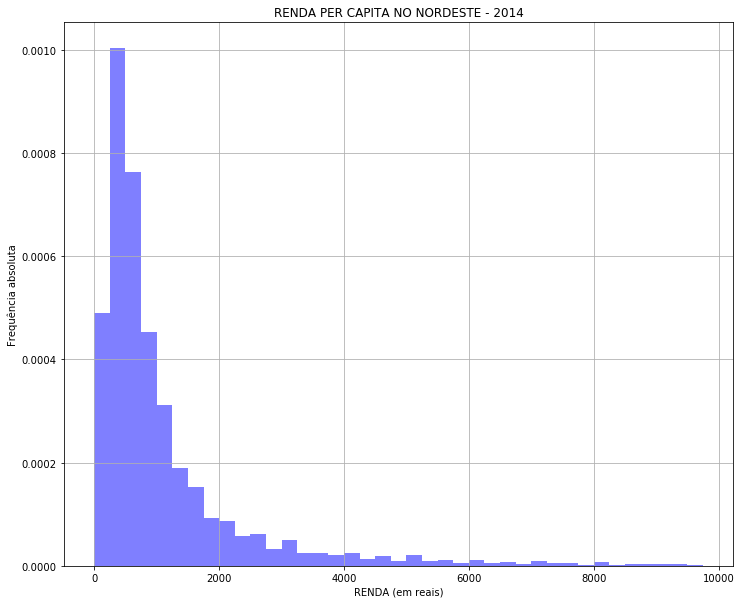

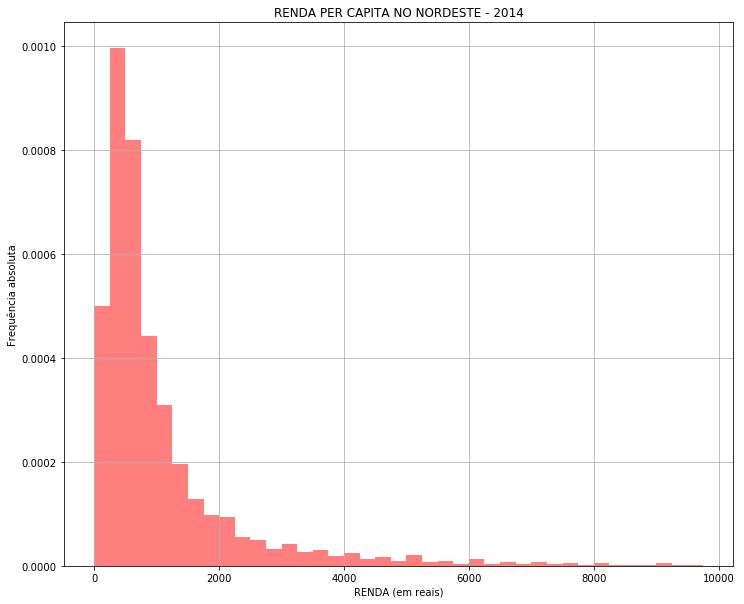

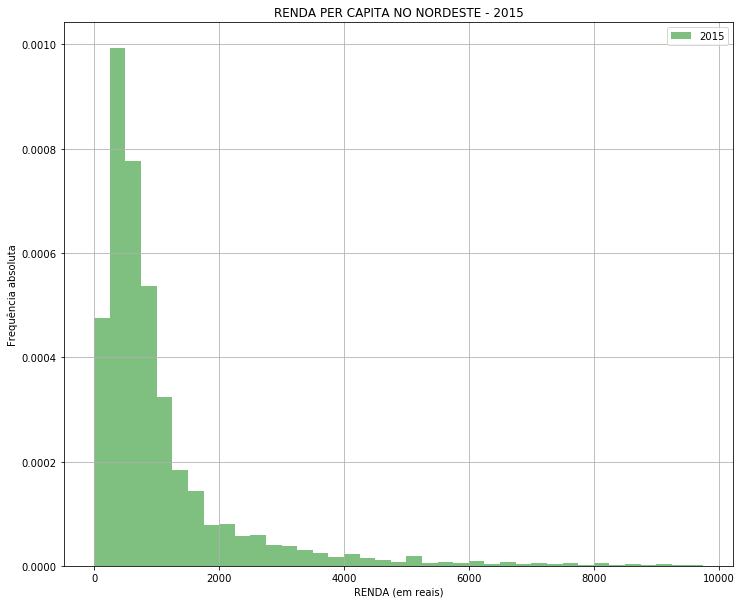

In [55]:
plot2 = nordeste2013b['RENDA PER CAPITA (em R$)'].plot.hist(bins=faixa, title='RENDA PER CAPITA NO NORDESTE - 2014', figsize=(12,10), normed = 1, alpha=0.5, color='b', label='2013')
plt.ylabel('Frequência absoluta')
plt.xlabel('RENDA (em reais)')
plt.grid()
plt.show()

plot2 = nordeste2014b['RENDA PER CAPITA (em R$)'].plot.hist(bins=faixa, title='RENDA PER CAPITA NO NORDESTE - 2014', figsize=(12,10), normed = 1, alpha=0.5, color='r', label='2014')
plt.ylabel('Frequência absoluta')
plt.xlabel('RENDA (em reais)')
plt.grid()
plt.show()

plot3 = nordeste2015b['RENDA PER CAPITA (em R$)'].plot.hist(bins=faixa, title='RENDA PER CAPITA NO NORDESTE - 2015', figsize=(12,10), normed = 1, alpha=0.5,color='g',label='2015')
plt.ylabel('Frequência absoluta')
plt.xlabel('RENDA (em reais)')
plt.grid()
plt.legend()
plt.show()

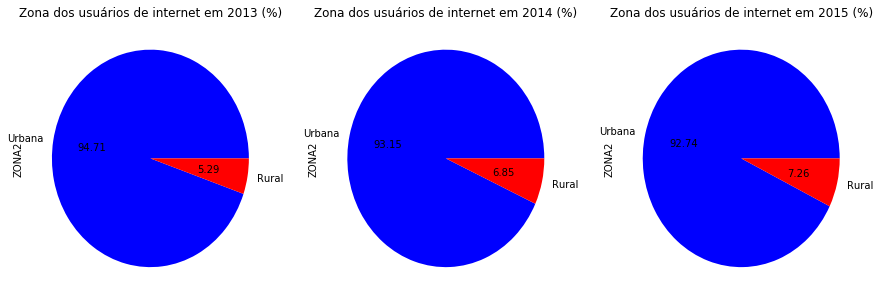

In [60]:
fig = plt.figure(figsize=(15, 5))

plt.subplot(131)
evc1 = nordeste2013b['ZONA2'].value_counts()
evc1.plot(kind='pie', colors=('b', 'r'), autopct="%.2f", title='Zona dos usuários de internet em 2013 (%)', legend=False)

plt.subplot(132)
evc2 = nordeste2014b['ZONA2'].value_counts()
evc2.plot(kind='pie', colors=('b', 'r'), autopct="%.2f", title='Zona dos usuários de internet em 2014 (%)', legend=False)

plt.subplot(133)
evc3 = nordeste2015b['ZONA2'].value_counts()
evc3.plot(kind='pie', colors=('b', 'r'), autopct="%.2f", title='Zona dos usuários de internet em 2015 (%)', legend=False)

In [62]:
ct1=pd.crosstab(nordeste2013a['ACESSO À INTERNET EM CASA'], nordeste2013a['ESTADO'], margins=True, rownames=['ACESSO À INTERNET EM CASA'], colnames=['ESTADOS'], normalize='columns')*100
ct1 = ct1.head(2)

ct2=pd.crosstab(nordeste2014a['ACESSO À INTERNET EM CASA'], nordeste2014a['ESTADO'], margins=True, rownames=['ACESSO À INTERNET EM CASA'], colnames=['ESTADOS'], normalize='columns')*100
ct2 = ct2.head(2)

ct3=pd.crosstab(nordeste2015a['ACESSO À INTERNET EM CASA'], nordeste2015a['ESTADO'], margins=True, rownames=['ACESSO À INTERNET EM CASA'], colnames=['ESTADOS'], normalize='columns')*100
ct3 = ct3.head(2)

ct1

ESTADOS,Maranhão,Piauí,Ceará,Rio Grande do Norte,Paraíba,Pernambuco,Alagoas,Sergipe,Bahia,All
ACESSO À INTERNET EM CASA,,,,,,,,,,
Possui acesso,19.617986,25.245098,37.028057,39.870968,37.734864,40.573083,31.159875,37.820849,40.622182,36.721119
Não possui acesso,80.382014,74.754902,62.971943,60.129032,62.265136,59.426917,68.840125,62.179151,59.377818,63.278881


In [17]:
ct3

ESTADOS,Maranhão,Piauí,Ceará,Rio Grande do Norte,Paraíba,Pernambuco,Alagoas,Sergipe,Bahia,All
ACESSO À INTERNET EM CASA,,,,,,,,,,
Possui acesso,33.128599,36.86067,45.601852,55.916775,53.723677,53.82929,40.0,57.411273,53.043478,49.252494
Não possui acesso,66.871401,63.13933,54.398148,44.083225,46.276323,46.17071,60.0,42.588727,46.956522,50.747506


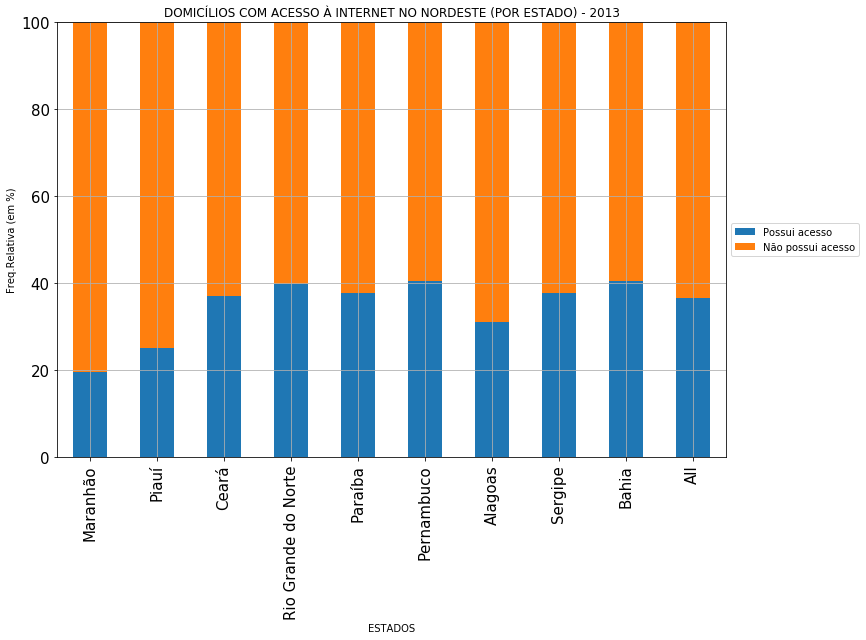

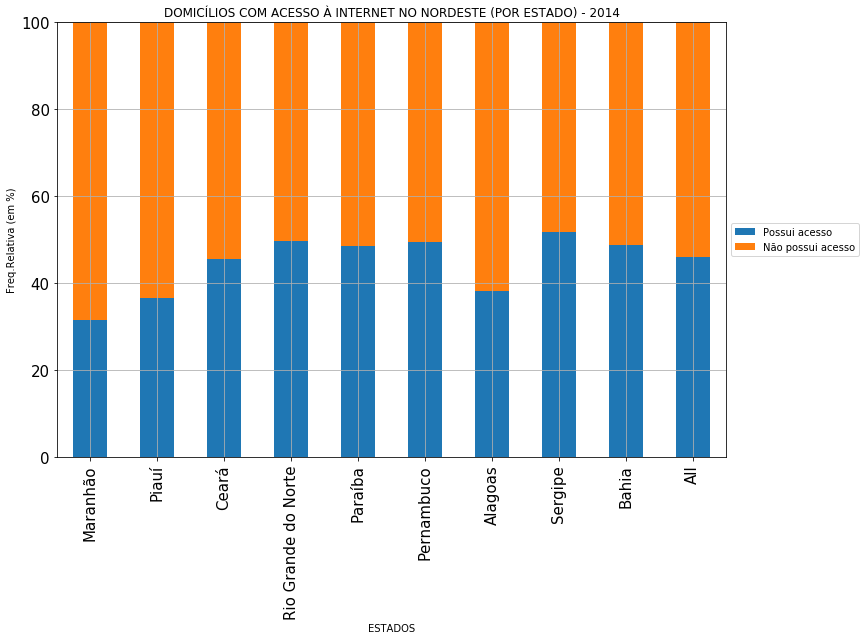

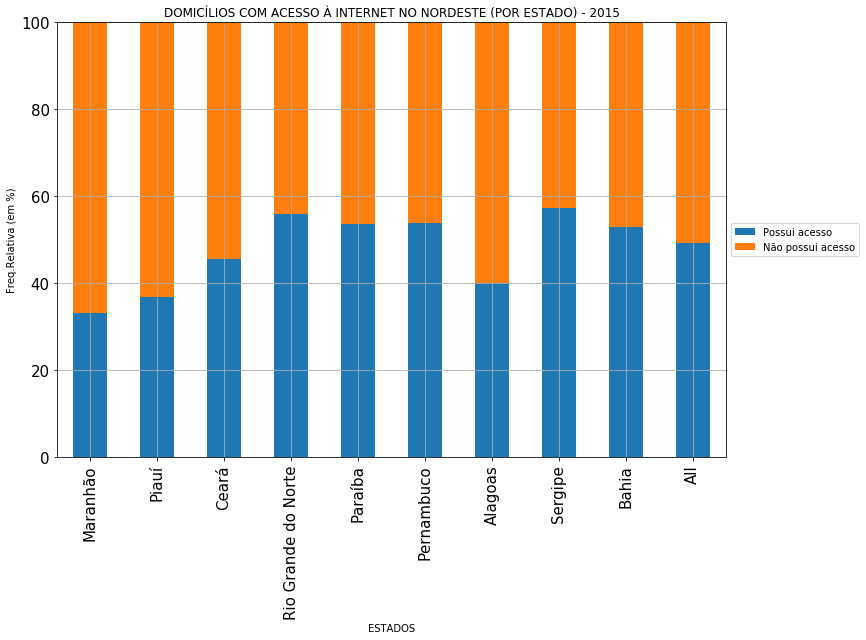

In [63]:
plot = ct1.T.plot(kind='bar', stacked=True,title='DOMICÍLIOS COM ACESSO À INTERNET NO NORDESTE (POR ESTADO) - 2013',fontsize=15)
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em %)')
plt.grid()

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 2, box.height*2])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))



plot = ct2.T.plot(kind='bar', stacked=True,title='DOMICÍLIOS COM ACESSO À INTERNET NO NORDESTE (POR ESTADO) - 2014',fontsize=15)
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em %)')
plt.grid()

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 2, box.height*2])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))



plot = ct3.T.plot(kind='bar', stacked=True,title='DOMICÍLIOS COM ACESSO À INTERNET NO NORDESTE (POR ESTADO) - 2015',fontsize=15)
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em %)')
plt.grid()

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width *2, box.height*2])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [64]:
cel1 = nordeste2013b[nordeste2013b['ACESSO À INTERNET POR CELULAR']=='Sim']
mc1 = nordeste2013b[nordeste2013b['ACESSO À INTERNET POR MICROCOMPUTADOR']=='Sim']
tab1 = nordeste2013b[nordeste2013b['ACESSO À INTERNET POR TABLET']=='Sim']


cel2 = nordeste2014b[nordeste2014b['ACESSO À INTERNET POR CELULAR']=='Sim']
mc2 = nordeste2014b[nordeste2014b['ACESSO À INTERNET POR MICROCOMPUTADOR']=='Sim']
tab2 = nordeste2014b[nordeste2014b['ACESSO À INTERNET POR TABLET']=='Sim']


cel3 = nordeste2015b[nordeste2015b['ACESSO À INTERNET POR CELULAR']=='Sim']
mc3 = nordeste2015b[nordeste2015b['ACESSO À INTERNET POR MICROCOMPUTADOR']=='Sim']
tab3 = nordeste2015b[nordeste2015b['ACESSO À INTERNET POR TABLET']=='Sim']

In [82]:
a1 = pd.value_counts(cel1['ACESSO À INTERNET POR CELULAR'])

b1 = pd.value_counts(mc1['ACESSO À INTERNET POR MICROCOMPUTADOR'])

c1 = pd.value_counts(tab1['ACESSO À INTERNET POR TABLET'])

print('Número de pessoas que acessam a internet pelo celular - 2013')
print(a1)

print('Número de pessoas que acessam a internet pelo microcomputador - 2013')
print(b1)

print('Número de pessoas que acessam a internet pelo tablet - 2013')
print(c1)

Número de pessoas que acessam a internet pelo celular - 2013
Sim    6300
Não       0
Name: ACESSO À INTERNET POR CELULAR, dtype: int64
Número de pessoas que acessam a internet pelo microcomputador - 2013
Sim    9296
Não       0
Name: ACESSO À INTERNET POR MICROCOMPUTADOR, dtype: int64
Número de pessoas que acessam a internet pelo tablet - 2013
Sim    1766
Não       0
Name: ACESSO À INTERNET POR TABLET, dtype: int64


In [83]:
a2 = pd.value_counts(cel2['ACESSO À INTERNET POR CELULAR'])

b2 = pd.value_counts(mc2['ACESSO À INTERNET POR MICROCOMPUTADOR'])

c2 = pd.value_counts(tab2['ACESSO À INTERNET POR TABLET'])

print('Número de pessoas que acessam a internet pelo celular - 2014')
print(a2)

print('Número de pessoas que acessam a internet pelo microcomputador - 2014')
print(b2)

print('Número de pessoas que acessam a internet pelo tablet - 2014')
print(c2)

Número de pessoas que acessam a internet pelo celular - 2014
Sim    12215
Não        0
Name: ACESSO À INTERNET POR CELULAR, dtype: int64
Número de pessoas que acessam a internet pelo microcomputador - 2014
Sim    9941
Não       0
Name: ACESSO À INTERNET POR MICROCOMPUTADOR, dtype: int64
Número de pessoas que acessam a internet pelo tablet - 2014
Sim    2981
Não       0
Name: ACESSO À INTERNET POR TABLET, dtype: int64


In [81]:
a3 = pd.value_counts(cel3['ACESSO À INTERNET POR CELULAR'])

b3 = pd.value_counts(mc3['ACESSO À INTERNET POR MICROCOMPUTADOR'])

c3 = pd.value_counts(tab3['ACESSO À INTERNET POR TABLET'])

print('Número de pessoas que acessam a internet pelo celular - 2015')
print(a3)

print('Número de pessoas que acessam a internet pelo microcomputador - 2015')
print(b3)

print('Número de pessoas que acessam a internet pelo tablet - 2015')
print(c3)

Número de pessoas que acessam a internet pelo celular - 2015
Sim    14983
Não        0
Name: ACESSO À INTERNET POR CELULAR, dtype: int64
Número de pessoas que acessam a internet pelo microcomputador - 2015
Sim    9383
Não       0
Name: ACESSO À INTERNET POR MICROCOMPUTADOR, dtype: int64
Número de pessoas que acessam a internet pelo tablet - 2015
Sim    2914
Não       0
Name: ACESSO À INTERNET POR TABLET, dtype: int64


In [84]:
x1 = {'Modo de acesso':pd.Series(['Celular','Microcomputador','Tablet'],index=['Celular','Microcomputador','Tablet'])}
x1 = pd.DataFrame(x1)

x2 = {'Modo de acesso':pd.Series(['Celular','Microcomputador','Tablet'],index=['Celular','Microcomputador','Tablet'])}
x2 = pd.DataFrame(x2)

x3 = {'Modo de acesso':pd.Series(['Celular','Microcomputador','Tablet'],index=['Celular','Microcomputador','Tablet'])}
x3 = pd.DataFrame(x3)

In [89]:
y1 = {'Modo de acesso':pd.Series([6300,9296,1766],index=['Celular','Microcomputador','Tablet'])}
y1 = pd.DataFrame(y1)

y2 = {'Modo de acesso':pd.Series([12215,9941,2981],index=['Celular','Microcomputador','Tablet'])}
y2 = pd.DataFrame(y2)

y3 = {'Número de domícilios':pd.Series([15147,9498,2963],index=['Celular','Microcomputador','Tablet'])}
y3 = pd.DataFrame(y3)

In [90]:
tabf1 = pd.concat([x1,y1], axis=1)
tabf1

tabf2 = pd.concat([x2,y2], axis=1)
tabf2

tabf3 = pd.concat([x3,y3], axis=1)
tabf1

,Modo de acesso,Modo de acesso
Celular,Celular,6300
Microcomputador,Microcomputador,9296
Tablet,Tablet,1766


(0, 16044)

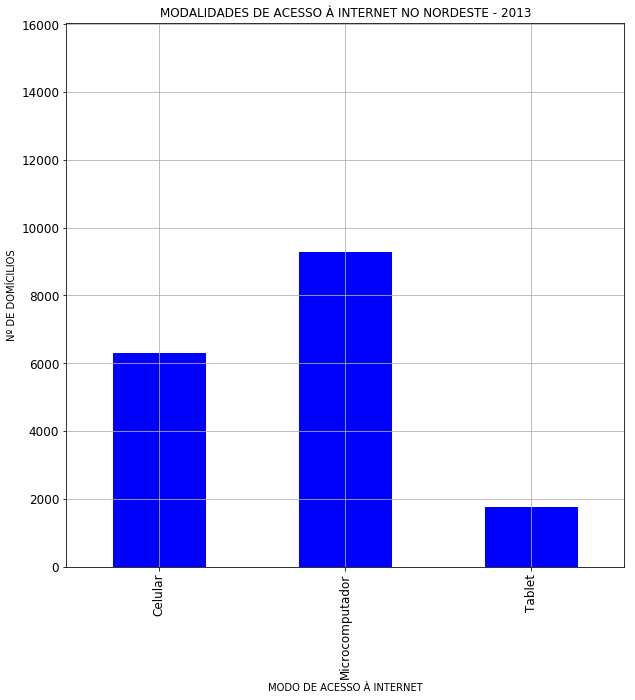

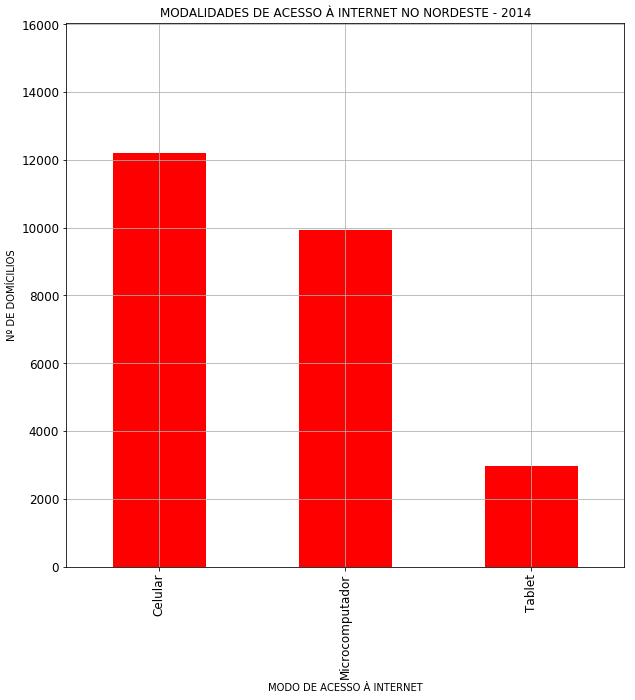

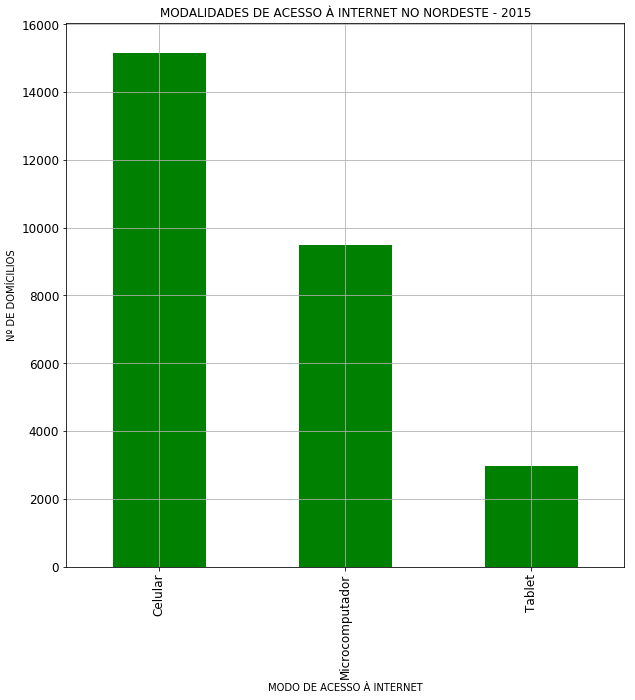

In [95]:
plot = tabf1.plot(kind='bar', title ="MODALIDADES DE ACESSO À INTERNET NO NORDESTE - 2013",figsize=(10,10),legend=False, fontsize=12,color='b')

plt.grid()
plt.ylabel('Nº DE DOMÍCILIOS')
plt.xlabel('MODO DE ACESSO À INTERNET')
plot.set_ylim([0, 16044])

plot = tabf2.plot(kind='bar', title ="MODALIDADES DE ACESSO À INTERNET NO NORDESTE - 2014",figsize=(10,10),legend=False, fontsize=12,color='r')

plt.grid()
plt.ylabel('Nº DE DOMÍCILIOS')
plt.xlabel('MODO DE ACESSO À INTERNET')
plot.set_ylim([0, 16044])

plot = tabf3.plot(kind='bar', title ="MODALIDADES DE ACESSO À INTERNET NO NORDESTE - 2015",figsize=(10,10),legend=False, fontsize=12,color='g')

plt.grid()
plt.ylabel('Nº DE DOMÍCILIOS')
plt.xlabel('MODO DE ACESSO À INTERNET')
plot.set_ylim([0, 16044])

In [ ]:
nordeste.to_csv('Projeto1_HugoGR.csv', index=False, encoding='utf-8')